In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Step 1- Understanding the Business Statement:
Credit risk refers to the uncertainty faced by an organization while lending money to an individual, business, or organization. Credit risk analysis is defined as a detailed review, and inspection done by the lending organization regarding the borrower about their financial background, modes of earning, and the capability to repay the borrowed credit.

CRA can be done on the basis of the "5C's of Credit":-
1)Character of the borrower- payment history will help us to know that.
2)Capacity of the borrower to repay- can be known from income, profession, wealth.
3)Collateral set by the borrower- value of the asset set as guarantee also determines the amount of loan to be given.
4)Capital- Overall wealth of the borrower
5)Conditions- refers to the the conditions set to the borrower like the loan amount provided, rate of interest, monthly repayment amount, calculated on the basis of the other 4 C's.

## So here we have to determine whether the defaulter previous loans have been approved, cancelled, refused or Unused offer

### Step 2- Data Wrangling - Also known as Data Munging or Data Pre-processing, is the process of gathering, assessing and cleaning of raw data into a form suitable for analysis.

This involves 3 steps:-

#### i) Gathering of Data

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
pdf=pd.read_csv('previous_application.csv') # pdf-previous dataframe
cdf=pd.read_csv('application_data.csv')# cdf-current dataframe

In [4]:
pdf.shape

(1670214, 37)

In [5]:
pdf.info(verbose=True) # verbose=True displays all the columns info and this is needed as there are a lot of columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Identifying the Target variable.- Since we just need to understand the defaulters payment history, we can try to create a separate dataframe with records of only the current defaulters.

In [6]:
ndf=cdf.loc[cdf['TARGET']==1] # Forming a dataframe of records of Target=1
id_list=list()
id_list=ndf['SK_ID_CURR'] # Just taking the ID series . This will have the ID's of only target=1
id_list

0         100002
26        100031
40        100047
42        100049
81        100096
           ...  
307448    456186
307475    456215
307481    456225
307489    456233
307509    456254
Name: SK_ID_CURR, Length: 24825, dtype: int64

In [7]:
n_pdf = pdf[(pdf['SK_ID_CURR'].isin(id_list))] # Creating a new dataframe with only data in the previous_application.csv, matched according to the defaulter's current ID 

In [8]:
n_pdf.shape

(122360, 37)

### ii) Find the Missing values

In [9]:
mv1=n_pdf.isnull().sum()
mv1.to_csv('missing_values3.csv')

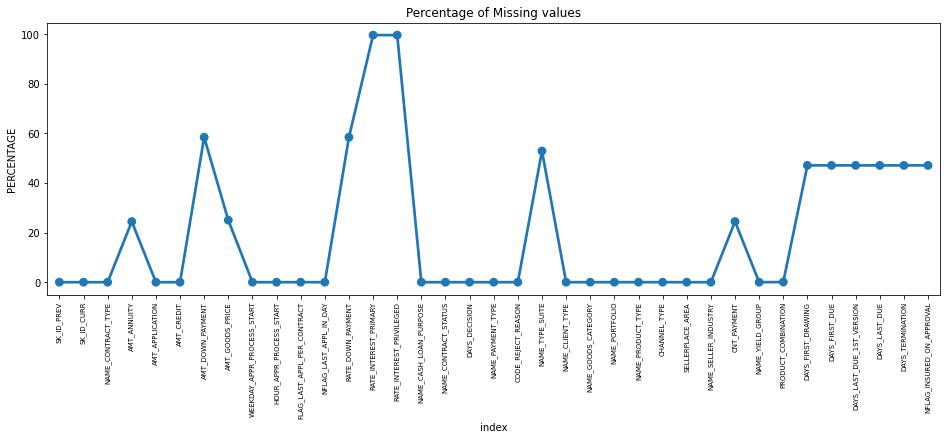

In [10]:
missing = pd.DataFrame(mv1*100/n_pdf.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)# plotting the percentage value graph
plt.xticks(rotation =90,fontsize =7) # This writes the x-axis labels vertically
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### So here we see that the maximum no of missing values are in the series:-
### 1)AMT_ANNUITY- 24.5%
### 2)AMT_CREDIT-0.000817261%
### 3)AMT_DOWN_PAYMENT-58.5%
### 4)AMT_GOODS_PRICE-25%
### 5)RATE_DOWN_PAYMENT-58.55
### 6)RATE_INTEREST_PRIMARY-99.7%
### 7)RATE_INTEREST_PRIVILEGED-99.7%
### 8)NAME_TYPE_SUITE-53%
### 9)CNT_PAYMENT-24.5%
### 10)PRODUCT_COMBINATION-0.05%
### 11)DAYS_FIRST_DRAWING-47.12%
### 12)DAYS_FIRST_DUE-47.12%
### 13)DAYS_LAST_DUE_1ST_VERSION-47.12%
### 14)DAYS_LAST_DUE-47.12%
### 15)DAYS_TERMINATION-47.12%
### 16)NFLAG_INSURED_ON_APPROVAL-47.12%
### Due to the large no of missing values RATE_INTEREST is be dropped as they will not provide any insights.

In [11]:
n_pdf.drop(columns=['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],inplace=True)

### Due to the large no of missing values DAYS_DUE AND DAYS_TERMINATION AND N-FLAG ON APPROVAL CAN BE DROPPED , RATE_OF_DOWN_PAYMENT, AMT_OF_DOWN_PAYMENT, NAME_TYPE_SUITE

In [12]:
n_pdf.drop(columns=n_pdf.columns[29:],inplace=True)

In [13]:
n_pdf.drop(columns=['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT'],inplace=True)

In [14]:
n_pdf.drop(columns=['NAME_TYPE_SUITE'],inplace=True)

### Let's see the statistics of Amt_Annuity, Amt_Goods_price as they have 25% missing values and if possible we can impute the vales.

In [15]:
n_pdf['AMT_ANNUITY'].describe()

count     92423.000000
mean      15109.345476
std       13534.284499
min           0.000000
25%        5929.177500
50%       10911.375000
75%       19924.942500
max      281027.250000
Name: AMT_ANNUITY, dtype: float64

In [16]:
#Let's fill the missing values in 'AMT_ANNUITY' with the mean value.
n_pdf["AMT_ANNUITY"].fillna(15109.345, inplace = True)

In [17]:
n_pdf['AMT_ANNUITY'].isnull().sum()

0

In [18]:
n_pdf['AMT_GOODS_PRICE'].describe()

count    9.174500e+04
mean     2.267164e+05
std      3.106593e+05
min      0.000000e+00
25%      4.669650e+04
50%      1.115955e+05
75%      2.385000e+05
max      3.982500e+06
Name: AMT_GOODS_PRICE, dtype: float64

### Since there is a huge difference between the mean and standard deviation we will drop this column as it has 25% missing values

In [19]:
n_pdf.drop(columns=['AMT_GOODS_PRICE'],inplace=True)

In [20]:
n_pdf.drop(columns=['CNT_PAYMENT'],inplace=True)

## for PDT_COMBINATION AND AMT_CREDIT the missing values are very less and can be ignored by dropping the row.

In [21]:
n_pdf = n_pdf.dropna(how='any',axis=0) 

In [22]:
mv1=n_pdf.isnull().sum()

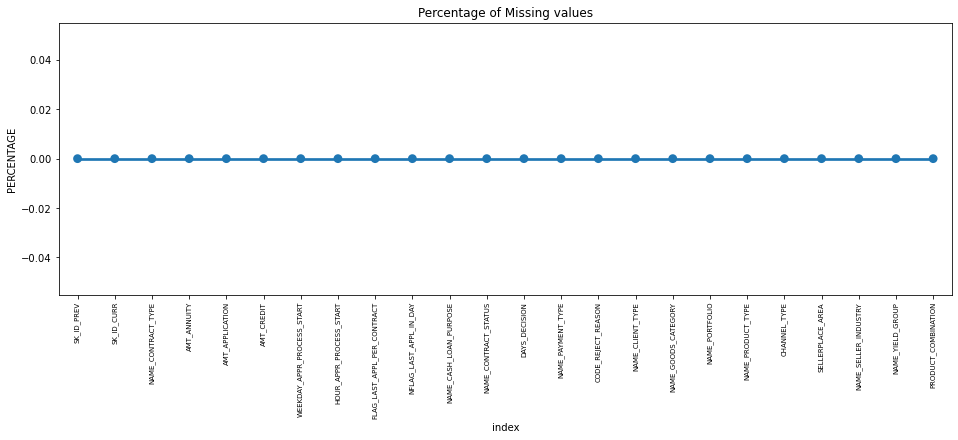

In [23]:
missing = pd.DataFrame(mv1*100/n_pdf.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)# plotting the percentage value graph
plt.xticks(rotation =90,fontsize =7) # This writes the x-axis labels vertically
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [24]:
n_pdf['Target']=1

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

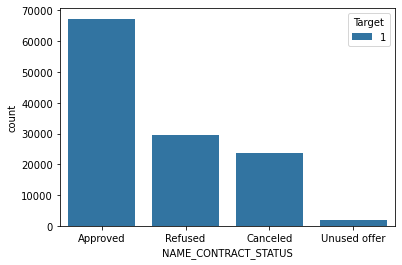

In [25]:
sns.countplot(x='NAME_CONTRACT_STATUS',data=n_pdf, hue='Target')

### This shows that more tahn 50% of the present defaulters loans were approved last time.

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='AMT_CREDIT'>

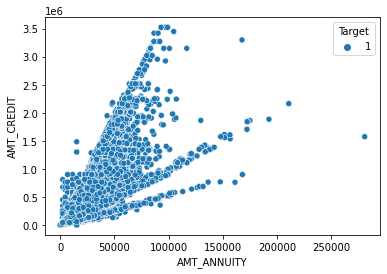

In [26]:
sns.scatterplot(x='AMT_ANNUITY',y='AMT_CREDIT',hue='Target',data=n_pdf)

<AxesSubplot:>

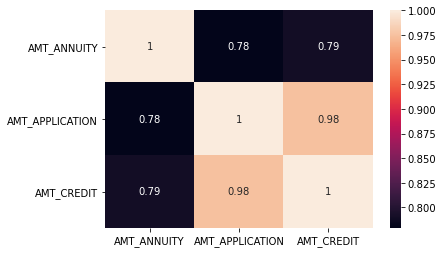

In [27]:
source_corr=n_pdf[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT']]
sns.heatmap(source_corr.corr(),annot=True)

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='AMT_APPLICATION'>

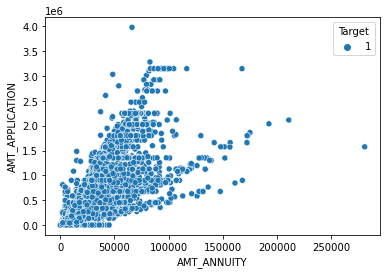

In [28]:
sns.scatterplot(x='AMT_ANNUITY',y='AMT_APPLICATION',hue='Target',data=n_pdf)

In [29]:
n_pdf['AMT_ANNUITY'].describe()

count    122296.000000
mean      15109.468907
std       11765.644003
min           0.000000
25%        7265.643750
50%       15109.345000
75%       15943.500000
max      281027.250000
Name: AMT_ANNUITY, dtype: float64

## The above scatterplot and corr values show that AMT_ANNUITY, AMT_CREDIT,AMT_APPLICATION are highly correlated. And AMT_APPLICATION AND AMT_CREDIT ARE ALMOST SAME SINCE THEY HAVE A CORRELATION FACTOR OF 0.98.

In [30]:
n_pdf['Amt_Annuity_grp']=''
n_pdf.loc[(n_pdf['AMT_ANNUITY']<=10000),'Amt_Annuity_grp']='[0-10k]'
n_pdf.loc[(n_pdf['AMT_ANNUITY']>10000) & (n_pdf['AMT_ANNUITY']<=15000),'Amt_Annuity_grp']='[10k-15k]'
n_pdf.loc[(n_pdf['AMT_ANNUITY']>15000) & (n_pdf['AMT_ANNUITY']<=20000),'Amt_Annuity_grp']='[15k-20k]'
n_pdf.loc[(n_pdf['AMT_ANNUITY']>20000) & (n_pdf['AMT_ANNUITY']<=30000),'Amt_Annuity_grp']='[20k-30k]'
n_pdf.loc[(n_pdf['AMT_ANNUITY']>30000) & (n_pdf['AMT_ANNUITY']<=40000),'Amt_Annuity_grp']='[30k-40k]'
n_pdf.loc[(n_pdf['AMT_ANNUITY']>40000) & (n_pdf['AMT_ANNUITY']<=50000),'Amt_Annuity_grp']='[40k-50k]'

n_pdf.loc[(n_pdf['AMT_ANNUITY']>50000),'Amt_Annuity_grp']='[>50k]'

<AxesSubplot:xlabel='Amt_Annuity_grp', ylabel='count'>

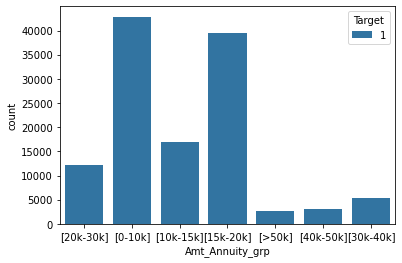

In [31]:
sns.countplot(x='Amt_Annuity_grp',hue='Target',data=n_pdf)

In [32]:
n_pdf.groupby(['Amt_Annuity_grp','NAME_CONTRACT_STATUS']).size()

Amt_Annuity_grp  NAME_CONTRACT_STATUS
[0-10k]          Approved                35117
                 Canceled                   88
                 Refused                  7588
                 Unused offer               40
[10k-15k]        Approved                12381
                 Canceled                   79
                 Refused                  4505
                 Unused offer               27
[15k-20k]        Approved                 6402
                 Canceled                23130
                 Refused                  8117
                 Unused offer             1811
[20k-30k]        Approved                 7469
                 Canceled                  201
                 Refused                  4411
[30k-40k]        Approved                 2919
                 Canceled                  107
                 Refused                  2292
                 Unused offer                1
[40k-50k]        Approved                 1519
                 Cance

## most OF THE Defaulters had an annuity of upto 20k mostly but the rejected and cancelled cases were maximum for the annuity range (15-20k)

In [33]:
n_pdf.groupby(['CODE_REJECT_REASON','NAME_CONTRACT_STATUS']).size()

CODE_REJECT_REASON  NAME_CONTRACT_STATUS
CLIENT              Unused offer             1879
HC                  Refused                 17123
LIMIT               Refused                  6000
SCO                 Refused                  3263
SCOFR               Refused                  2276
SYSTEM              Refused                    42
VERIF               Refused                   285
XAP                 Approved                67242
                    Canceled                23744
XNA                 Refused                   442
dtype: int64

<AxesSubplot:xlabel='CODE_REJECT_REASON', ylabel='count'>

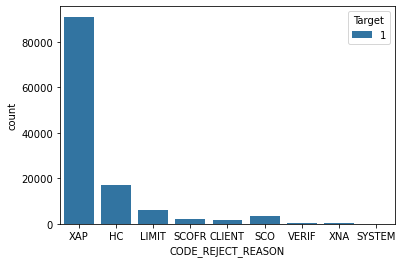

In [34]:
sns.countplot(x='CODE_REJECT_REASON',hue='Target',data=n_pdf)

## The reason for most no of rejections has been stated as XAP.

In [35]:
n_pdf['AMT_APPLICATION'].describe()

count    1.222960e+05
mean     1.700073e+05
std      2.863409e+05
min      0.000000e+00
25%      0.000000e+00
50%      6.664500e+04
75%      1.800000e+05
max      3.982500e+06
Name: AMT_APPLICATION, dtype: float64

In [36]:
n_pdf['Amt_Application_grp']=''
n_pdf.loc[(n_pdf['AMT_APPLICATION']<=50000),'Amt_Application_grp']='[0-50k]'
n_pdf.loc[(n_pdf['AMT_APPLICATION']>50000) & (n_pdf['AMT_APPLICATION']<=100000),'Amt_Application_grp']='[50k-1lac]'
n_pdf.loc[(n_pdf['AMT_APPLICATION']>100000) & (n_pdf['AMT_APPLICATION']<=200000),'Amt_Application_grp']='[1-2lac]'
n_pdf.loc[(n_pdf['AMT_APPLICATION']>200000) & (n_pdf['AMT_APPLICATION']<=300000),'Amt_Application_grp']='[2-3lac]'
n_pdf.loc[(n_pdf['AMT_APPLICATION']>300000) & (n_pdf['AMT_APPLICATION']<=400000),'Amt_Application_grp']='[3-4lac]'
n_pdf.loc[(n_pdf['AMT_APPLICATION']>400000) & (n_pdf['AMT_APPLICATION']<=500000),'Amt_Application_grp']='[4-5lac]'

n_pdf.loc[(n_pdf['AMT_APPLICATION']>500000),'Amt_Application_grp']='[>5lac]'

In [37]:
n_pdf.groupby(['Amt_Application_grp','NAME_CONTRACT_STATUS']).size()

Amt_Application_grp  NAME_CONTRACT_STATUS
[0-50k]              Approved                22586
                     Canceled                23010
                     Refused                  8544
                     Unused offer              836
[1-2lac]             Approved                13646
                     Canceled                   97
                     Refused                  4802
                     Unused offer              329
[2-3lac]             Approved                 5789
                     Canceled                   91
                     Refused                  3701
                     Unused offer               19
[3-4lac]             Approved                 2265
                     Canceled                   32
                     Refused                  1637
                     Unused offer                6
[4-5lac]             Approved                 2880
                     Canceled                  168
                     Refused            

<AxesSubplot:xlabel='Amt_Application_grp', ylabel='count'>

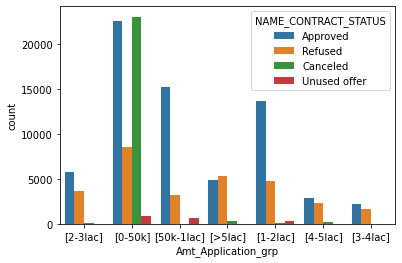

In [38]:
sns.countplot(x='Amt_Application_grp',hue='NAME_CONTRACT_STATUS',data=n_pdf)

### This shows that the max number of Approved and Cancelled+Refused were for the Application amount range of 0-50k.

In [39]:
n_pdf.groupby(['NAME_SELLER_INDUSTRY','NAME_CONTRACT_STATUS']).size()

NAME_SELLER_INDUSTRY  NAME_CONTRACT_STATUS
Auto technology       Approved                  356
                      Refused                    67
Clothing              Approved                  969
                      Refused                   168
                      Unused offer                2
Connectivity          Approved                16193
                      Canceled                  186
                      Refused                  3872
                      Unused offer             1631
Construction          Approved                 1436
                      Refused                   233
                      Unused offer                2
Consumer electronics  Approved                21343
                      Canceled                   25
                      Refused                  4258
                      Unused offer              184
Furniture             Approved                 2532
                      Canceled                   21
                     

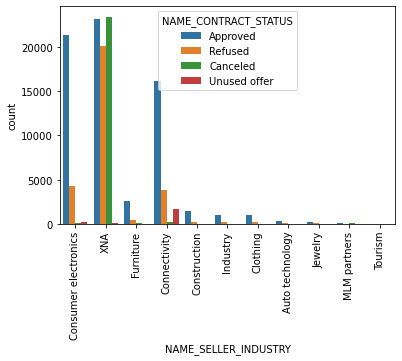

In [40]:
sns.countplot(x='NAME_SELLER_INDUSTRY',hue='NAME_CONTRACT_STATUS',data=n_pdf)
plt.xticks(rotation=90)
plt.show()

### This shows that the max number of Approval, Refusal and Cancelled happened in the XNA category of 'Industry Type'

In [41]:
n_pdf.groupby(['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS']).size()

NAME_CASH_LOAN_PURPOSE        NAME_CONTRACT_STATUS
Building a house or an annex  Approved                   73
                              Canceled                    7
                              Refused                   244
Business development          Approved                    9
                              Canceled                    2
                                                      ...  
XAP                           Unused offer             1839
XNA                           Approved                17532
                              Canceled                19336
                              Refused                 12571
                              Unused offer               19
Length: 80, dtype: int64

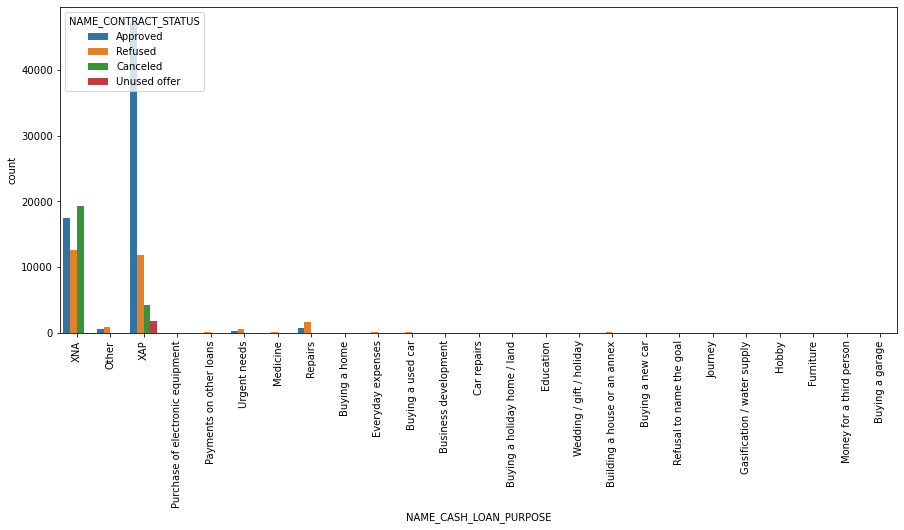

In [42]:
from matplotlib import pyplot # For sizing the countplot
a4_dims = (15, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(data=n_pdf, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',ax=ax)

plt.xticks(rotation=90)
plt.show()

## The Reason for most of the cancelled or refused offers is also not clear as they come under XNA or XAP.

In [43]:
n_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122296 entries, 27 to 1670204
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   122296 non-null  int64  
 1   SK_ID_CURR                   122296 non-null  int64  
 2   NAME_CONTRACT_TYPE           122296 non-null  object 
 3   AMT_ANNUITY                  122296 non-null  float64
 4   AMT_APPLICATION              122296 non-null  float64
 5   AMT_CREDIT                   122296 non-null  float64
 6   WEEKDAY_APPR_PROCESS_START   122296 non-null  object 
 7   HOUR_APPR_PROCESS_START      122296 non-null  int64  
 8   FLAG_LAST_APPL_PER_CONTRACT  122296 non-null  object 
 9   NFLAG_LAST_APPL_IN_DAY       122296 non-null  int64  
 10  NAME_CASH_LOAN_PURPOSE       122296 non-null  object 
 11  NAME_CONTRACT_STATUS         122296 non-null  object 
 12  DAYS_DECISION                122296 non-null  int64  
 1

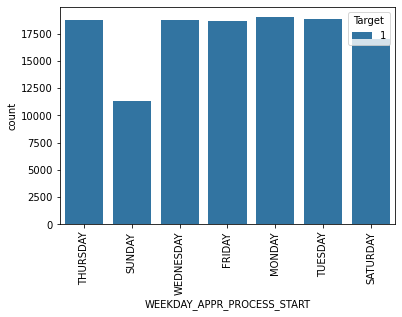

WEEKDAY_APPR_PROCESS_START  Target
FRIDAY                      1         18657
MONDAY                      1         19002
SATURDAY                    1         17032
SUNDAY                      1         11276
THURSDAY                    1         18748
TUESDAY                     1         18845
WEDNESDAY                   1         18736
dtype: int64


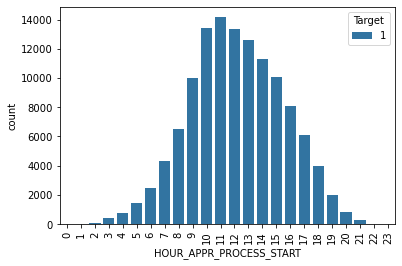

HOUR_APPR_PROCESS_START  Target
0                        1            14
1                        1            14
2                        1            88
3                        1           401
4                        1           778
5                        1          1463
6                        1          2463
7                        1          4287
8                        1          6497
9                        1         10026
10                       1         13418
11                       1         14169
12                       1         13328
13                       1         12616
14                       1         11278
15                       1         10059
16                       1          8059
17                       1          6127
18                       1          4005
19                       1          2028
20                       1           851
21                       1           269
22                       1            42
23                       

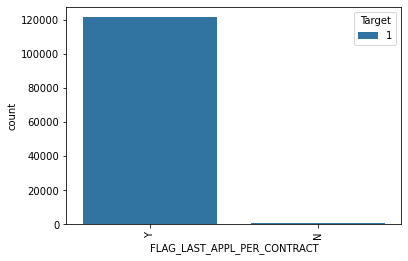

FLAG_LAST_APPL_PER_CONTRACT  Target
N                            1            791
Y                            1         121505
dtype: int64


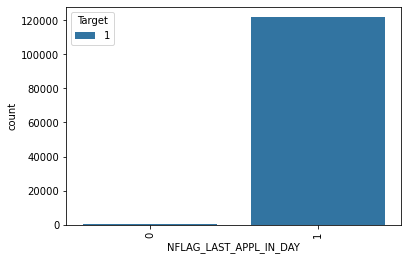

NFLAG_LAST_APPL_IN_DAY  Target
0                       1            505
1                       1         121791
dtype: int64


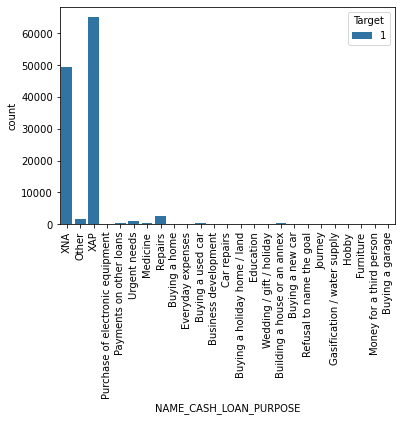

NAME_CASH_LOAN_PURPOSE            Target
Building a house or an annex      1           324
Business development              1            46
Buying a garage                   1             7
Buying a holiday home / land      1            55
Buying a home                     1            84
Buying a new car                  1            80
Buying a used car                 1           318
Car repairs                       1           127
Education                         1           140
Everyday expenses                 1           216
Furniture                         1            85
Gasification / water supply       1            45
Hobby                             1             9
Journey                           1           111
Medicine                          1           251
Money for a third person          1             4
Other                             1          1673
Payments on other loans           1           252
Purchase of electronic equipment  1           117
Refusal t

In [44]:
for i, predictor in enumerate(n_pdf.iloc[:,6:11]):# All rows, columns from 7nd to 10th
    plt.figure(i)
    sns.countplot(data=n_pdf, x=predictor, hue='Target')
    plt.xticks(rotation=90)
    plt.show()
    print(n_pdf.groupby([predictor,"Target"]).size())

### From the graphs above, we can conclude that in Previous application Defaulters:
### 1) Loan was applied for on all weekdays.
### 2)The time of application varied between 9am-3pm mostly
### 3)It was the last application of the previous contract and it was the last application per day of the client.
### 4)The purpose of loan available as per records- XAP or XNA

## So the MAximum Approvals are for the 'CAsh through the bank' payment method.
## The MAximum number of Applicants were repeaters and hence accordingly they were approved, refused or cancelled.
## The Goods_category of the maximum number of refusals or cancellled fall under the XNA category
## Name-portfolio and product_type also shows XNA for the maximum cancelled applications.

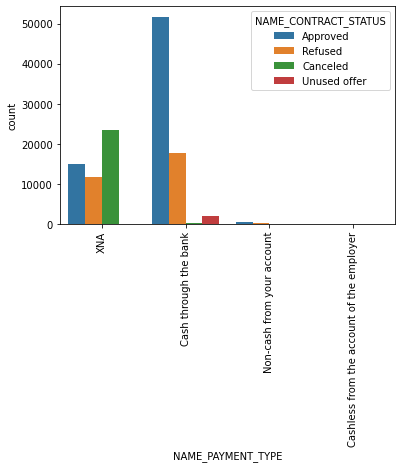

NAME_PAYMENT_TYPE                          NAME_CONTRACT_STATUS
Cash through the bank                      Approved                51718
                                           Canceled                  228
                                           Refused                 17591
                                           Unused offer             1843
Cashless from the account of the employer  Approved                   56
                                           Canceled                    1
                                           Refused                    17
                                           Unused offer                2
Non-cash from your account                 Approved                  467
                                           Canceled                    2
                                           Refused                   110
                                           Unused offer                4
XNA                                        Approved         

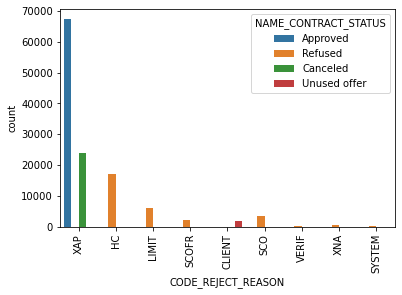

CODE_REJECT_REASON  NAME_CONTRACT_STATUS
CLIENT              Unused offer             1879
HC                  Refused                 17123
LIMIT               Refused                  6000
SCO                 Refused                  3263
SCOFR               Refused                  2276
SYSTEM              Refused                    42
VERIF               Refused                   285
XAP                 Approved                67242
                    Canceled                23744
XNA                 Refused                   442
dtype: int64


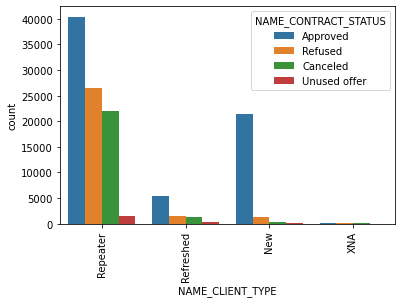

NAME_CLIENT_TYPE  NAME_CONTRACT_STATUS
New               Approved                21383
                  Canceled                  417
                  Refused                  1371
                  Unused offer              167
Refreshed         Approved                 5401
                  Canceled                 1304
                  Refused                  1472
                  Unused offer              253
Repeater          Approved                40427
                  Canceled                21942
                  Refused                 26550
                  Unused offer             1456
XNA               Approved                   31
                  Canceled                   81
                  Refused                    38
                  Unused offer                3
dtype: int64


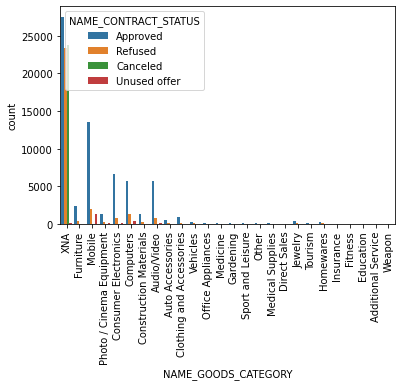

NAME_GOODS_CATEGORY  NAME_CONTRACT_STATUS
Additional Service   Approved                    4
                     Refused                     3
Audio/Video          Approved                 5714
                     Canceled                    1
                     Refused                   790
                                             ...  
Weapon               Refused                     1
XNA                  Approved                27562
                     Canceled                23729
                     Refused                 23429
                     Unused offer               40
Length: 73, dtype: int64


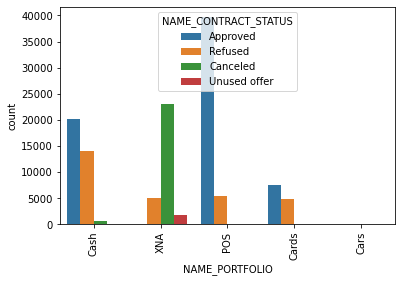

NAME_PORTFOLIO  NAME_CONTRACT_STATUS
Cards           Approved                 7444
                Canceled                   56
                Refused                  4895
Cars            Approved                   14
                Canceled                    3
                Refused                     4
Cash            Approved                20116
                Canceled                  651
                Refused                 13999
POS             Approved                39668
                Canceled                   13
                Refused                  5477
                Unused offer               82
XNA             Canceled                23021
                Refused                  5056
                Unused offer             1797
dtype: int64


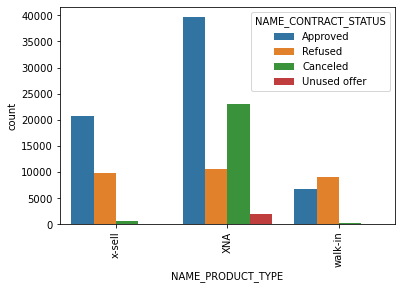

NAME_PRODUCT_TYPE  NAME_CONTRACT_STATUS
XNA                Approved                39682
                   Canceled                23037
                   Refused                 10537
                   Unused offer             1879
walk-in            Approved                 6766
                   Canceled                  176
                   Refused                  9049
x-sell             Approved                20794
                   Canceled                  531
                   Refused                  9845
dtype: int64


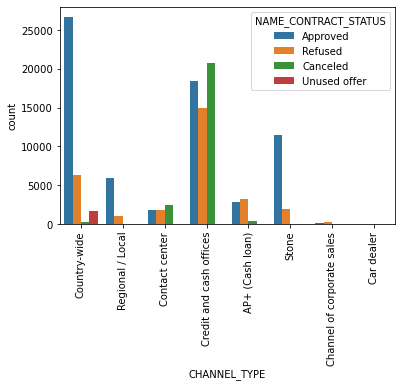

CHANNEL_TYPE                NAME_CONTRACT_STATUS
AP+ (Cash loan)             Approved                 2780
                            Canceled                  404
                            Refused                  3180
Car dealer                  Approved                   14
                            Canceled                    3
                            Refused                     4
Channel of corporate sales  Approved                  116
                            Canceled                    6
                            Refused                   222
Contact center              Approved                 1778
                            Canceled                 2409
                            Refused                  1861
Country-wide                Approved                26668
                            Canceled                  201
                            Refused                  6260
                            Unused offer             1736
Credit and cash offices

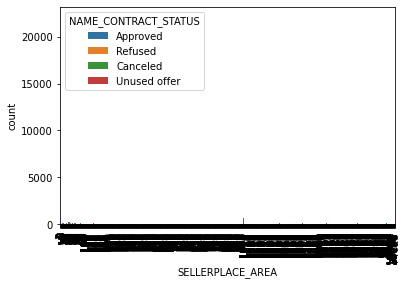

SELLERPLACE_AREA  NAME_CONTRACT_STATUS
-1                Approved                19843
                  Canceled                22122
                  Refused                 16502
                  Unused offer               29
 0                Approved                 1673
                                          ...  
 30200            Approved                   32
                  Refused                    10
 49151            Approved                    2
 74625            Approved                   20
                  Refused                     3
Length: 2398, dtype: int64


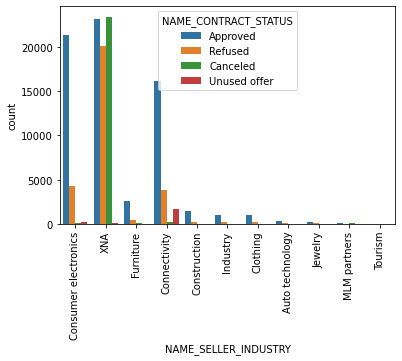

NAME_SELLER_INDUSTRY  NAME_CONTRACT_STATUS
Auto technology       Approved                  356
                      Refused                    67
Clothing              Approved                  969
                      Refused                   168
                      Unused offer                2
Connectivity          Approved                16193
                      Canceled                  186
                      Refused                  3872
                      Unused offer             1631
Construction          Approved                 1436
                      Refused                   233
                      Unused offer                2
Consumer electronics  Approved                21343
                      Canceled                   25
                      Refused                  4258
                      Unused offer              184
Furniture             Approved                 2532
                      Canceled                   21
                     

In [51]:
for i, predictor in enumerate(n_pdf.iloc[:,13:22]):# All rows, columns from 7nd to 10th
    plt.figure(i)
    sns.countplot(data=n_pdf, x=predictor,hue='NAME_CONTRACT_STATUS')
    plt.xticks(rotation=90)
    plt.show()
    print(n_pdf.groupby([predictor,'NAME_CONTRACT_STATUS']).size())
    
